# All taxa analysis

# 1) Import needed data

### a) Silva OTUs

In [1]:
# Import OTU Table
SilvaOTUs <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')#, row.names=1)
row.names(SilvaOTUs) <-SilvaOTUs[,"OTU"]                                # Make OTU row names -- required!!!

In [2]:
otu_V <- SilvaOTUs

In [3]:
# Sort OTU table                                                                      
otu_V <-otu_V[order(otu_V$Consensus.lineage),]                                                         # sort by lineage

# Make new top level plotting var (should be in PRE-PROCESS ? )
otu_V$Taxonomy <- ifelse(otu_V$Phylum == "Proteobacteria", paste(otu_V$Class), paste(otu_V$Phylum))    # head(otu_V)
otu_V <- data.frame(otu_V)

In [4]:
# otu_agg <- agg_by_cat(otu_V, "Taxonomy")                                # Aggregate OTU table by taxonomy
# otu_agg

### b) metadata

In [5]:
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

### c) Taxa colors

In [6]:
# Reimport color legend from barplots
Taxons3d <-read.table("../data/colors/Test_taxonomy_color_pallete.txt", sep="\t", header = T)
# head(Taxons3d)

In [7]:
# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)               # site_colors
colnames(site_colors) <-c('color','Location')                                                        # site_colors
site_colours <- (site_colors$color)            

# 2) Plot taxon abundance

In [8]:
source("../modules/5_OTU_barplots_module_v0.4.R")       # working under R 4.0.2


Using Taxonomy as id variables

Using Taxonomy as id variables



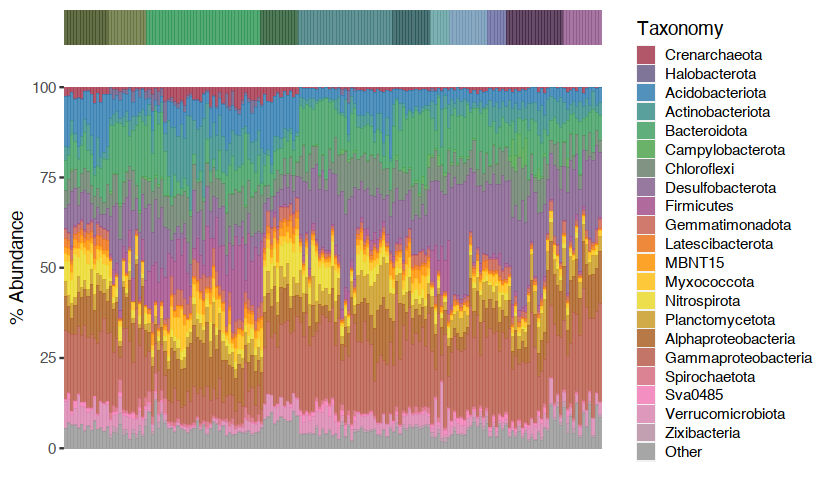

In [9]:
# Here makes a DENOVO COLOR PALETTE 
# Note "Set 1" (can use any R palette), blank positions indicate 
Site_sort <- abund_loc_barplot(otu_V, "Taxonomy", metaDB, order_var = "EWsiteHyd_index", plot = "", colors = "",
                               color_set = "Set1", relab="% Abundance")

options(repr.plot.width=7, repr.plot.height=4)
Site_sort

### This uses the original taxonomy color pallette 
### shows MAJOR CHANGES IN COMPOSITION at the Phylum level

Using Taxonomy as id variables



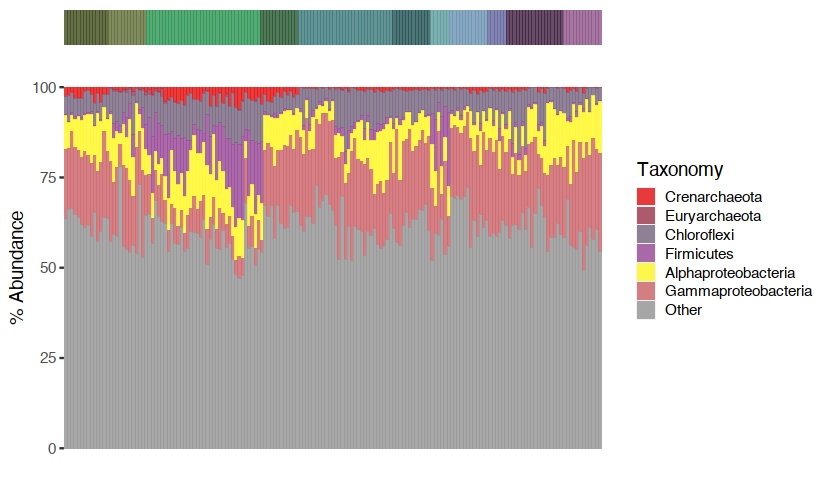

In [10]:
Site_sort <- abund_loc_barplot(otu_V, "Taxonomy", metaDB, "EWsiteHyd_index", "", Taxons3d, relab="% Abundance")
Site_sort


# 3) Export the NEW color palette
#### Likely want to use this later for Taxonomic correlations, Guilds
- and should test it!

In [27]:
# aggregate taxonomy by "Taxonomy"
otu_agg <- agg_by_cat(otu_V, "Taxonomy")                            # Aggregate OTU table by taxonomy

In [29]:
# Get only NEW color palette
# Note without output_palette = T this makes a plot instead w/o site colors
# Also, this is where you can SET MIN ABUNDANCE (hardcoded in other plot type??)
library(dplyr)
tax_palette0 <- Taxon_bar_newC(otu_agg, "Set1", min_abund=0.005, output_palette=T) %>%
    dplyr::filter(Taxonomy != "")
tax_palette0


Attaching package: ‘dplyr’


The following objects are masked from ‘package:Hmisc’:

    src, summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Using Taxonomy as id variables



Taxonomy,color
<chr>,<chr>
Acidobacteriota,#A73C52
Actinobacteriota,#6B5F88
Alphaproteobacteria,#3780B3
Bacteroidota,#3F918C
Campylobacterota,#47A266
Chloroflexi,#53A651
Crenarchaeota,#6D8470
Desulfobacterota,#87638F
Firmicutes,#A5548D


In [30]:
# Test sort_new_palette function
# sorts by a key, could be something else
taxa_colors <- Sort_new_palette(tax_palette0, "Taxonomy", "Consensus.lineage", otu_V)

In [31]:
taxa_colors

Taxonomy,Index,color
<chr>,<int>,<chr>
Crenarchaeota,1,#A73C52
Halobacterota,2,#6B5F88
Acidobacteriota,3,#3780B3
Actinobacteriota,4,#3F918C
Bacteroidota,5,#47A266
Campylobacterota,6,#53A651
Chloroflexi,7,#6D8470
Desulfobacterota,8,#87638F
Firmicutes,9,#A5548D


In [32]:
write.table(taxa_colors, "../data/colors/Silva_taxonomy_color_pallete.txt", sep="\t", col.names=T, row.names=F, quote=T)

#### show new pallette works to load from source - don't have to remake it

In [33]:
Silva_colors <- read.table("../data/colors/Silva_taxonomy_color_pallete.txt", sep="\t", header = T)

Using Taxonomy as id variables



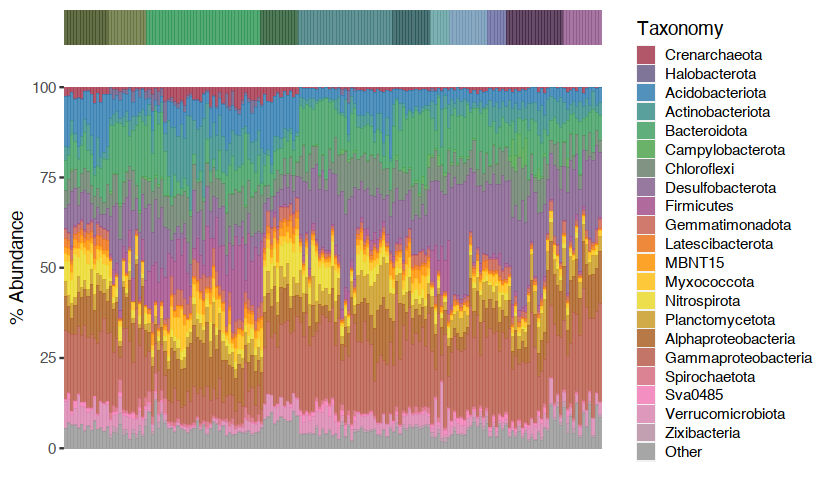

In [34]:
Site_sort <- abund_loc_barplot(otu_V, "Taxonomy", metaDB, order_var = "EWsiteHyd_index", plot = "",
                               colors = Silva_colors, color_set = Silva_colors, relab="% Abundance")

options(repr.plot.width=7, repr.plot.height=4)
Site_sort

In [35]:
# ggsave...

# 4) Other cool stuff you can do
- useful for guilds, inspection, etc.

In [36]:
names(metaDB)

[1] "X"               "EWsiteHyd_index" "Sample"          "MG_name"        
 [5] "Index"           "Location"        "Pl_Sp"           "EWcoastGroup"   
 [9] "SALTgroup"       "LU"              "Depth"           "EW.no"          
[13] "iTag_name.x"     "Site_indx"       "Salinity.x"      "Bulk_dens"      
[17] "H2O_FPS"         "CO2_mg_m2_h"     "CH4_ug_m2_h"     "CH4_CO2"        
[21] "pH"              "Cl"              "SO4"             "C"              
[25] "N"               "P"               "NO3_N"           "NH4_N"          
[29] "Olsen_P"         "CN"              "CP"              "NP"             
[33] "NP_ext"          "NO3_NH4"         "Fe"              "Mn"             
[37] "Cu"              "Zn"              "Cl_pw"           "SO4_pw"         
[41] "DOC_mg_L"        "Na_pw"           "K_pw"            "Ca_pw"          
[45] "Mn_pw"           "Mg_pw"           "Fe_pw"           "Cu_pw"          
[49] "Zn_pw"

In [37]:
min(metaDB['CH4_ug_m2_h'])

[1] -0.3413328

In [38]:
# Get log CH4 data, note n + 1 here is 0 = min + 5%
metaDB['CH4_logn1'] =  log10(metaDB['CH4_ug_m2_h'] - 1.05*min(metaDB['CH4_ug_m2_h']))

### a) make the site indicator bar a graph

Using Taxonomy as id variables



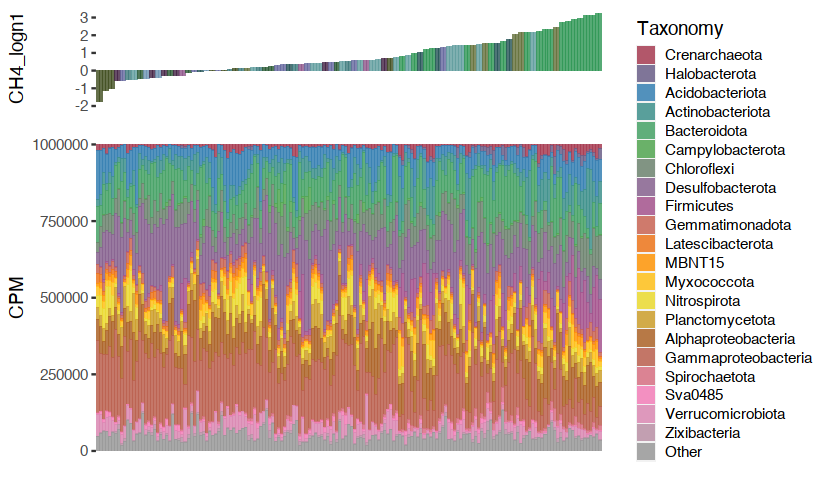

In [39]:
CH4_sort_taxa <-abund_loc_barplot(otu_V, "Taxonomy", metaDB, 'CH4_logn1', "graph", Silva_colors)
CH4_sort_taxa


### b) plot data subsets
- Note NEW taxonomic rank at which colors are applied ("Family" vs. "Taxonomy"
- note NEW color schemes here to not conflict
- also note % total vs. raw numbers

Using Family as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Family as id variables

Using Family as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Family as id variables



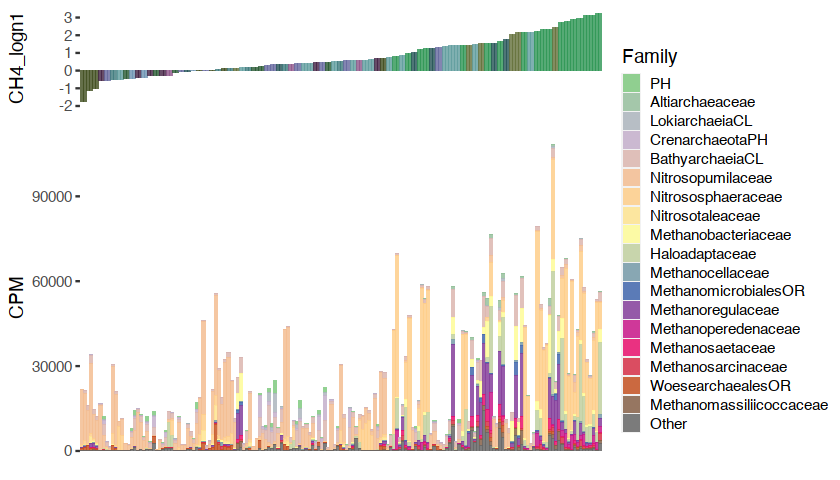

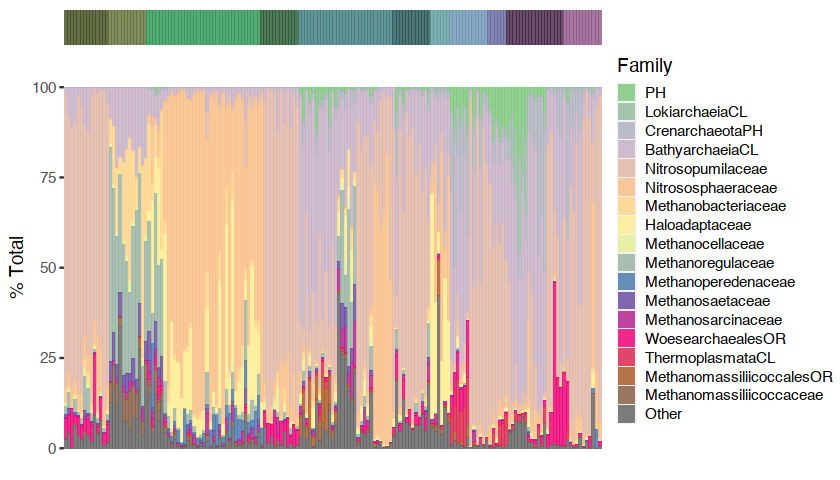

In [40]:
## Test subset of OTU table                                          # head(otu_V)
arch <- otu_V[otu_V$Kingdom=='Archaea',]                # subset     # dim(arch); head(arch)

Arch_by_CH4 <-abund_loc_barplot(arch, "Family", metaDB, "CH4_logn1", "graph", "", "Accent")
Arch_by_CH4_perc <-abund_loc_barplot(arch, "Family", metaDB, "EWsiteHyd_index", "", "", "Accent", relab="% Total")

# Arch_by_CH4 <-abund_loc_barplot(arch, "Family", Meta_iTag, "CH4_logn1", "graph", "", "Dark2")
# Arch_by_CH4_perc <-abund_loc_barplot(arch, "Family", Meta_iTag, "CH4_logn1", "graph", "", "Dark2", relab="% Total")

options(repr.plot.width=7, repr.plot.height=4)
Arch_by_CH4
Arch_by_CH4_perc

In [41]:
# arch

### d) also in library
- Samp_subset_OTU() -- would peel out Delta sites based on labels in a column

### c) plots with correlation filtering
- including positive and negative correlations 
- note metadata and CH4_logn1 calc above

In [42]:
# Prune metadata to only iTag samples
# Get Sample names in OTU table               
OTU_samps <- data.frame('Sample'=colnames(otu_V))                                        # OTU_samps

# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')                                       #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample

In [43]:
CH4corrRanksOTU <- read.table("correlations/CH4corrRanks_SilvaOTU.txt", sep = '\t')

# Note the correlation cutoff = 0.5
CorrFiltOTU <- OTU_corr_filt_OTU(otu_V, CH4corrRanksOTU, "Genus", 0.5)

In [44]:
# CorrFiltOTU

In [45]:
# note colors -- Taxons3d here vs. "Accent" for by Class
by_Tax <- corrFilt2barplot(CorrFiltOTU, "Genus", "Taxonomy", Meta_iTag, "CH4_logn1", "graph", Taxons3d)

Using Taxonomy as id variables

Using Taxonomy as id variables



In [46]:
by_Class <- corrFilt2barplot(CorrFiltOTU, "Genus", "Class", Meta_iTag, "CH4_logn1", "graph", "", "Accent")

Using Class as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Class as id variables

Using Class as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Class as id variables



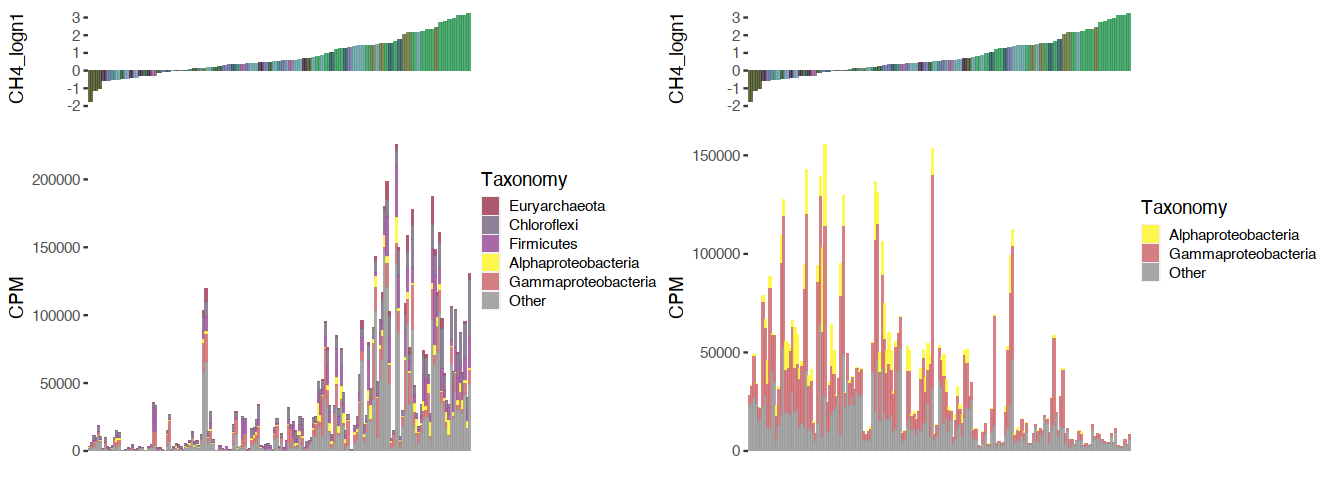

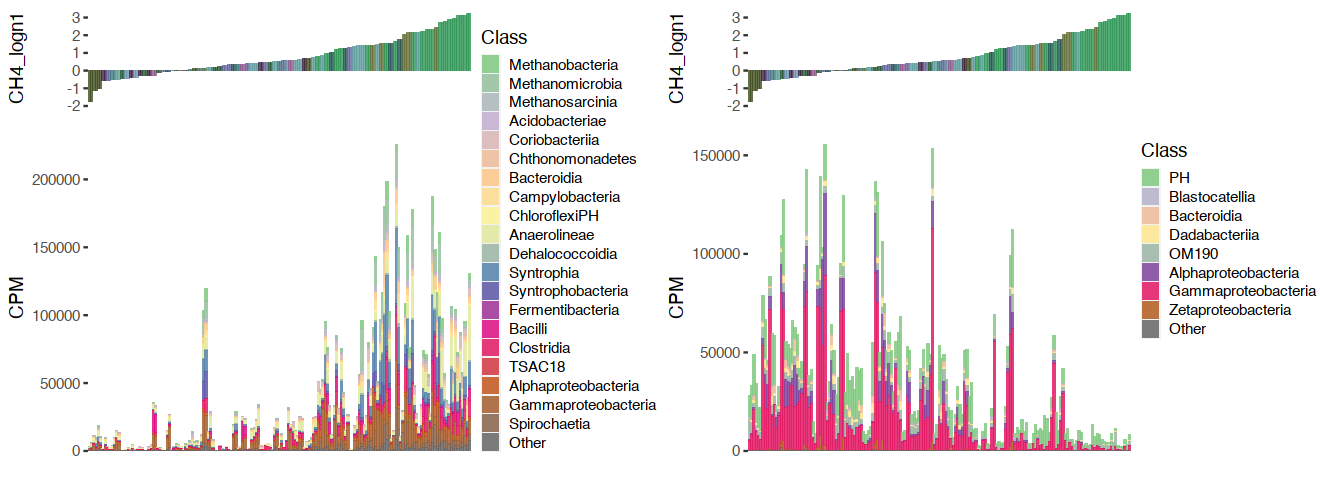

In [47]:
options(repr.plot.width=11, repr.plot.height=4)

by_Tax
by_Class

### Delta corrs & a subset

plot correlations as double plot

In [48]:
# Separate Delta Sites (oligo and FW)
# levels(Meta_iTag$SALTgroup)
Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup =="FW",]
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup =="Oligo",]

Meta_iTag_Delta <-rbind(Meta_iTag_FW, Meta_iTag_Oligo)                  # Meta_iTag_Delta

Delta_sites <-Meta_iTag_Delta[,"Sample"]                                # Delta sites

In [49]:
# Delta_sites <- as.character(Delta_sites)  ### FOR R 3.4.2, annoying

In [50]:
# Subset OTU table by Delta sites
tax_cols <- unlist(list("Consensus.lineage", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Taxonomy"))
Delta_tax <- c(Delta_sites, tax_cols)

Delta_OTU = otu_V[Delta_tax]

In [51]:
# Read pre-calculated CORRELATION table (Here, OTU level)
CH4corrRanksOTU_Delta <- read.table("correlations/CH4corrRanks_Silva_Delta_OTU.txt", sep = '\t')

In [52]:
# CORRELATION FILTER RESULTS
CorrFilt_OTU_Delta <- OTU_corr_filt_OTU(Delta_OTU, CH4corrRanksOTU_Delta, "Genus", 0.6)

Using Taxonomy as id variables

Using Taxonomy as id variables

Using Family as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Family as id variables

Using Family as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Family as id variables



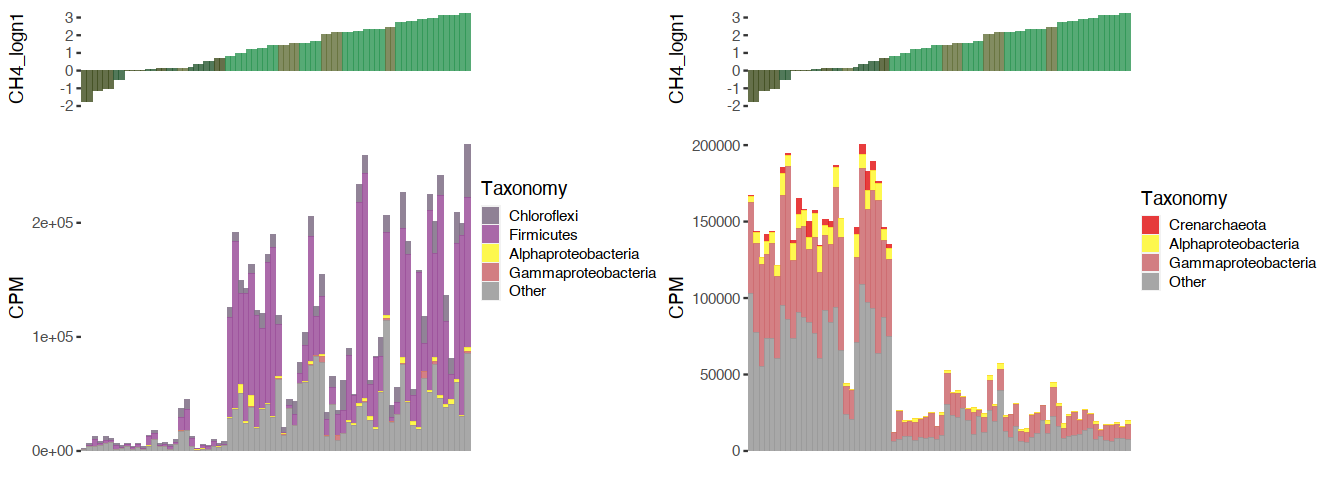

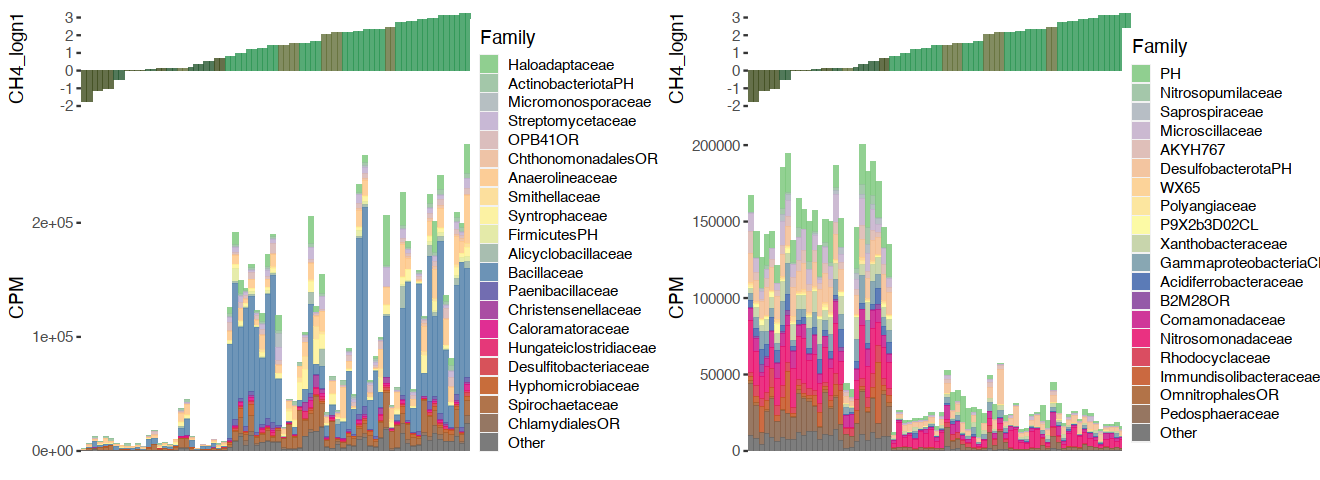

In [53]:
# Delta sites CORR subset plots
by_Tax <- corrFilt2barplot(CorrFilt_OTU_Delta, "Genus", "Taxonomy", Meta_iTag_Delta, "CH4_logn1", "graph", Taxons3d)
by_Class <- corrFilt2barplot(CorrFilt_OTU_Delta, "Genus", "Family", Meta_iTag_Delta, "CH4_logn1", "graph", "", "Accent")

options(repr.plot.width=11, repr.plot.height=4)
by_Tax
by_Class

Using Genus as id variables

Using Genus as id variables

Using Genus as id variables

Using Genus as id variables



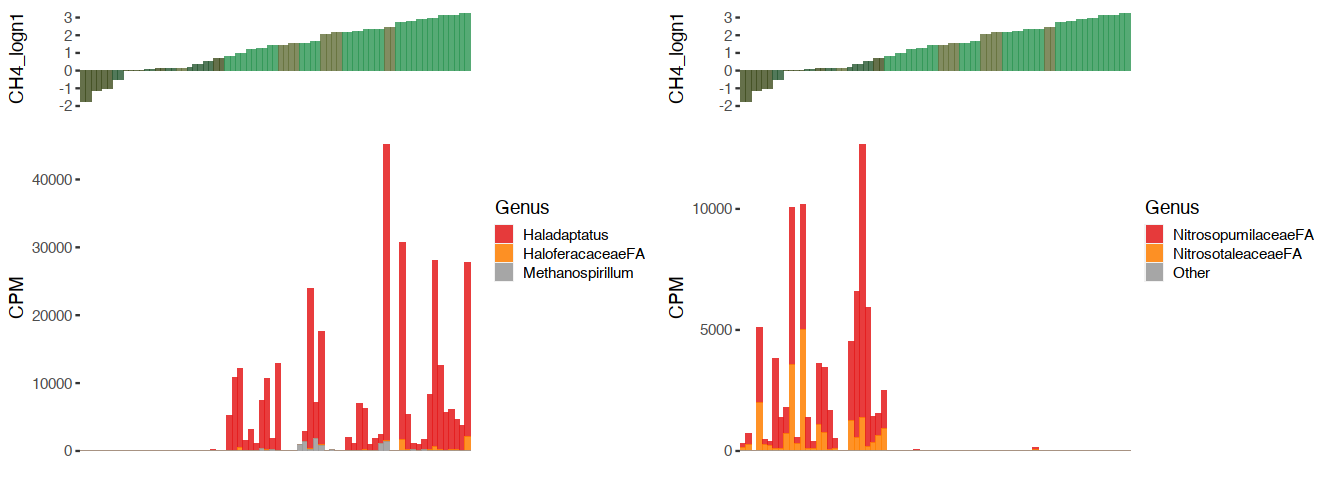

In [54]:
# Archaea in Delta

corr_Delta_Arch <-CorrFilt_OTU_Delta[CorrFilt_OTU_Delta["Kingdom"]=="Archaea",]

Ar_by_Genus <- corrFilt2barplot(corr_Delta_Arch, "Genus", "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "", "Set1")
Ar_by_Genus